In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=17)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35000, 784), (35000,), (35000, 784), (35000,))

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [7]:
pred_svm = svm.predict(X_test)
print(f"predictions are {pred_svm}")
acc_svm = accuracy_score(y_test, pred_svm)
print(f'accuracy is {acc_svm}')

predictions are ['3' '7' '7' ... '3' '6' '5']
accuracy is 0.9597142857142857


In [8]:
svm_conf = confusion_matrix(y_test, pred_svm)
svm_conf

array([[3440,    0,   12,    6,    3,   11,   13,   11,    9,    1],
       [   1, 3897,   22,    5,    7,    0,    3,   11,    8,    3],
       [  19,    8, 3306,   18,   16,    4,   12,   43,   24,    5],
       [   1,   16,   42, 3343,    1,   34,    1,   58,   34,   10],
       [   2,    3,   24,    0, 3291,    3,   13,   20,    5,   60],
       [   9,    7,   13,   35,    7, 3010,   26,   30,   16,    6],
       [  17,    3,   15,    1,    8,   27, 3328,   38,    9,    0],
       [   3,   16,   25,    8,   22,    1,    0, 3478,    0,   37],
       [   5,   24,   22,   32,   16,   39,   20,   22, 3243,   13],
       [   5,    8,   15,   36,   56,    8,    1,   92,   15, 3254]],
      dtype=int64)

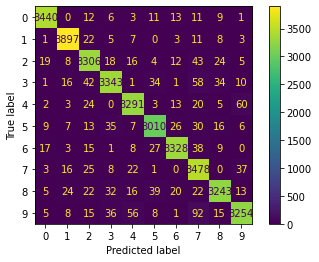

In [9]:
disp = ConfusionMatrixDisplay(svm_conf)
disp.plot()
plt.show()

In [62]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [63]:
lda_pred = lda.predict(X_test)
lda_acc = accuracy_score(y_test, lda_pred)
print(f"accuracy is {lda_acc}")

accuracy is 0.8659714285714286


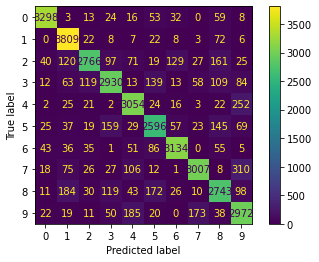

In [65]:
lda_conf = confusion_matrix(y_test, lda_pred)
disp_lda = ConfusionMatrixDisplay(lda_conf)
disp_lda.plot()
plt.show()

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
knn_pred = knn.predict(X_test)
print(f'accuracy for knn is {accuracy_score(y_test, knn_pred)}')

accuracy for knn is 0.9378


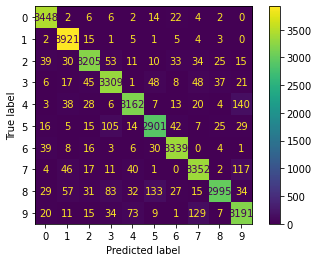

In [8]:
knn_conf = confusion_matrix(y_test, knn_pred)
disp_knn = ConfusionMatrixDisplay(knn_conf)
disp_knn.plot()
plt.show()

In [11]:
import numpy as np 

knn_accs = np.zeros(10)
for i in range(1,11):  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    knn_accs[i-1] = accuracy_score(y_test, knn_pred)

print(knn_accs)
for i in range(10):
    print(f'accuracy for {i} neighbors is {knn_accs[i]}')

[0.93774286 0.92694286 0.93885714 0.9368     0.9378     0.93571429
 0.93591429 0.9346     0.934      0.93245714]
accuracy for 0 neighbors is 0.9377428571428571
accuracy for 1 neighbors is 0.9269428571428572
accuracy for 2 neighbors is 0.9388571428571428
accuracy for 3 neighbors is 0.9368
accuracy for 4 neighbors is 0.9378
accuracy for 5 neighbors is 0.9357142857142857
accuracy for 6 neighbors is 0.9359142857142857
accuracy for 7 neighbors is 0.9346
accuracy for 8 neighbors is 0.934
accuracy for 9 neighbors is 0.9324571428571429


In [12]:
final_acc_knn = max(knn_accs)
final_acc_knn

0.9388571428571428